# Lab Assignment Six: CNNs
LJ Brown, Joe McGuire, Henry Warren, Mike Lefebvre, Xingming Qu

## 1. Business Understanding

In this lab we seek to categorize each image in a corpus of digital images depicting different culinary dishes. Our data source is Food-101, a 101,000 image dataset with 101 unique food categories which function as our target classes.

This data was initially collected for the HBO TV show “Silicon Valley”, one of the teams on the show decided to build an App, which takes a picture of the food and then identifies its category and displays some recipes and other information about it. However, the team member who was assigned to train the algorithm only scraped photos of hot dogs, so the machine could only categorize things as 'hot dog' or 'not hot dog.' Inspired by this TV show, we decided to make a more "advanced" classifier, which is able to identify more kinds of food and could actually serve a business use case (not the one presented in the show).

Our objective is to use this dataset to be able to accurately classify five common culinary dishes for the purpose of tracking food trends on Yelp and Zomato (counting the number of new images being uploaded depicting these various food items, looking at rate of uploads over time). In addition, we can also do "food embedding", which extracts the features of food and uses a feature vector to do clustering. After that, it would be feasible to set up a recommender system, in which our program could recommend another food to a user based on a food they say they enjoy.


The recommender system could be valuable both from a consumer perspective, in that it would allow the consumer to get a sense of what foods they might like to try, and from an industry perspective, in that it might allow R&D departments to get a better sense of which flavors are likely to flourish in which markets. In order for our recommender system to be valuable the ability of the system to adequately predict what an individual might like would be far more important than its ability to predict all foods which a user like. In other words if the system suggests to a user that they might want to try something and they don't like it, that would be a far more costly error than failing to suggest a food that the user might like. This is because the former might result in discontinued use of the system, whereas the latter is unlikely to create many problems. With this in mind, we believe that the system would need to predict which foods a user might like with 80-90% accuracy in order for consumers to be interested, but that the system would not need to show all of the foods a user might like

## 2. Dataset Description

Dataset: Food-101

Description: A challenging data set of 101 food categories, with 101,000 images.  For each of these food categories there are 250 manually reviewed test images, as well as 750 training images. 

However, in this lab, we manually chose 5 specific food categories (0_chicken_wings, 1_donuts, 2_hot_dog，3_pizza，4_sushi) for the classification task (as we believed it might've been too much to focus on more). Each category has 1000 images. In addition, we also resized all the images to 128x128x3 in advance to reduce computation time.



Reference: https://www.vision.ee.ethz.ch/datasets_extra/food-101/


## 3. Preparation

### 3.1 Choose and explain what metric(s) you will use to evaluate your algorithm’s generalization performance

In researching why accuracy is not necessarily a great evaluation metric, we discovered what's known as the "Accuracy Paradox," stating:

> Accuracy paradox for predictive analytics states that predictive models with a given level of accuracy may have greater predictive power than models with higher accuracy. <br/>
Source: https://en.wikipedia.org/wiki/Accuracy_paradox

The source is then perscriptive in its description, stating:
> It may be better to avoid the accuracy metric in favor of other metrics such as **precision** and **recall**. <br/>
Source: https://en.wikipedia.org/wiki/Accuracy_paradox

Given this paradox, accuracy may mistakenly perceived as a success metric, when a mix of precision and recall might be the better performance metric. Further research corroborated this hunch:
> Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.<br/>
Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Therefore, we chose the f1_score method, with micro averaging, to evaluate our algorithm's generalization performance. The f1_score algorithm (with accuracy parameter set to "micro") operates as a weighted average of precision and recall that calculates metrics globally by counting the total true positives, false negatives, and false positives.<br/>
Source: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

However, for our current use case accuracy provides valuable information as well at a glance, and can be contextualized when presented alongside the f1_score. Therefore, in this lab we utilize both the general accuracy and f1 score in our evaluation.



### 3.2 Choose the method you will use for dividing your data into training and testing

### In this task we did not use standard K-fold cross validation though we have balanced classes in the dataset. The reason this that 10 folds cross validation will take us forever to run. 
We decided to use an 80/20 split since there is a lot of images in each category. This should limit the amount of computation time required for this project.


### Note: in this lab we would like to consider both F1_score and accuracy when comparing models. Because training a model was so time consuming and we have no time for K fold cross validation.  Using proper statistical comparison techniques might not available because we only have one f1 score and one accuracy

### 3.1 Read in your images as numpy arrays. 
Resized images as 128x128x3 in advance

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from os.path import join as pjoin
from matplotlib import pyplot as plt
import random
import warnings
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
warnings.filterwarnings('ignore')

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#############################Change your folder first#############################

train_dir='C:\\SMU-Study\\S1\\CSE7324-Machine Learning in Python\\LABS\\Lab6\\final_data'
# Each label 0_chicken_wings, 1_donuts, 2_hot_dog，3_pizza，4_sushi
Label_list=['chicken_wings', 'donuts', 'hot_dog','pizza','sushi']
def readDataAndGetLabel(data_dir):
    data=[]
    label=[]
    for img_dir in os.listdir(data_dir):
        each_dir= pjoin(data_dir, img_dir)      #get each folder's name, 0_chicken_wings
        each_lable=int(img_dir.split('_')[0])   # use the firsr number as label
        print('reading....category ',each_lable)
        for img in os.listdir(each_dir): 
            img_dir = pjoin(each_dir, img)
            readimg=cv2.imread(img_dir)    # read each images
            data.append(readimg)
            label.append(each_lable)
    return data,label
    
X_raw,Y_raw=readDataAndGetLabel(train_dir)

reading....category  0
reading....category  1
reading....category  2
reading....category  3
reading....category  4


Visualize several images.

Total image: 5000
Show some pictures from data set


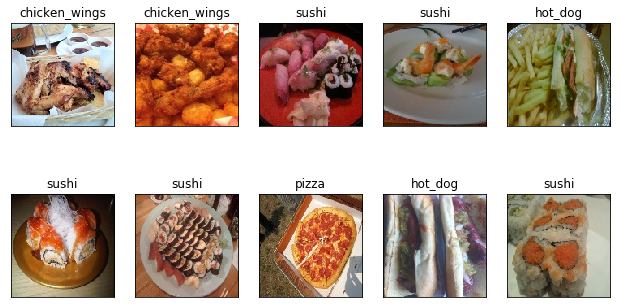

In [3]:
sample_size=len(X_raw)
print('Total image:', sample_size)
def randomShowImg(data,imRange, label,n_row=2, n_col=5):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        index=random.randint(0,imRange)  # random selecte pictures
        img=data[index]
        img = img[:,:,[2,1,0]] # change rgb channels to display 
        
        plt.imshow(img)
        plt.title(Label_list[label[index]], size=12)
        plt.xticks(())
        plt.yticks(())    
    
# show some training pictures 
print('Show some pictures from data set')
randomShowImg(X_raw,sample_size-1,Y_raw)


Data preprocessing

In [4]:
%%time 
NUM_CLASSES = 5
Y=np.array(Y_raw)
y_ohe = keras.utils.to_categorical(Y, NUM_CLASSES)
X=np.array(X_raw)
X=X/255.0 - 0.5

# flatten image into a vector for the MLP 
vector_X=X.reshape((sample_size,-1))


print('X vector shape:',vector_X.shape)
print('X shape:',X.shape)
print('Y shape:',Y.shape)
print('Yohe shape',y_ohe.shape)
img_wh = X.shape[1]
print('img wh:',img_wh)

X vector shape: (5000, 49152)
X shape: (5000, 128, 128, 3)
Y shape: (5000,)
Yohe shape (5000, 5)
img wh: 128
Wall time: 8.82 s


Make 80/20 split

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
# from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

K_fold=1
cv = ShuffleSplit(n_splits=K_fold,test_size=0.2)
fold=cv.split(X,Y)
X_train = []
X_test = []
X_train_vec=[]
X_test_vec=[]

y_train = []
y_test = []
y_train_ohe = []
y_test_ohe = []

for train_index, test_index in fold:
    X_train.append(X[train_index])
    X_test.append(X[test_index])
    X_train_vec.append(vector_X[train_index])
    X_test_vec.append(vector_X[test_index])
    
    y_train.append(Y[train_index])
    y_test.append(Y[test_index])
    y_train_ohe.append(y_ohe[train_index])
    y_test_ohe.append(y_ohe[test_index])
    


### 3.2 Create a convolutional neural network to use on your data using Keras.
#### 3.2.1 Setup the training to use data expansion in Keras.

In [6]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train[0])

#### 3.2.2Explain why the chosen data expansion techniques are appropriate for your dataset. 
Since the images of the food are taken by people, the foods will be visualized from many different angles in the data set. So it is appropriate to change the rotation, width/height shift. In addition, horizontal_flip is appropriate becuase the food itself remains the same, but its orientation is different.

In [7]:
b_size=128
E=100
Patience=16

In [15]:
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+' acc {:.4f}'.format(acc))

def plotresult(History):
    %matplotlib inline

    plt.figure(figsize=(10,4))
    plt.subplot(2,2,1)
    plt.plot(History.history['acc'])

    plt.ylabel('Accuracy %')
    plt.title('Training')
    plt.subplot(2,2,2)
    plt.plot(History.history['val_acc'])
    plt.title('Validation')

    plt.subplot(2,2,3)
    plt.plot(History.history['loss'])
    plt.ylabel('categorical_crossentropy Training Loss')
    plt.xlabel('epochs')

    plt.subplot(2,2,4)
    plt.plot(History.history['val_loss'])
    plt.xlabel('epochs')

In [9]:
%%time 
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 

cnnAlexNet = Sequential()

# let's start with an AlexNet style convolutional phase
cnnAlexNet.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,3),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnnAlexNet.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnnAlexNet.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    
# add one layer on flattened output
cnnAlexNet.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnnAlexNet.add(Flatten())
cnnAlexNet.add(Dense(128, activation='relu'))
cnnAlexNet.add(Dropout(0.5)) # add some dropout for regularization, again!
cnnAlexNet.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnnAlexNet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transformations
cnnAlexNet_history=cnnAlexNet.fit_generator(datagen.flow(X_train[0], y_train_ohe[0], batch_size=b_size), 
                   steps_per_epoch=int(len(X_train[0])/b_size), # how many generators to go through per epoch
                   epochs=E, verbose=1,
                   validation_data=(X_test[0],y_test_ohe[0]),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=Patience)]                         
                  )
cnnAlexNet.save('cnnAlexNet.h5')

Epoch 1/100
31/31 [==============================] - 13s 424ms/step - loss: 2.2006 - acc: 0.2119 - val_loss: 1.5603 - val_acc: 0.3170
Epoch 2/100
31/31 [==============================] - 11s 365ms/step - loss: 1.5159 - acc: 0.3085 - val_loss: 1.4333 - val_acc: 0.3810
Epoch 3/100
31/31 [==============================] - 12s 377ms/step - loss: 1.4456 - acc: 0.3629 - val_loss: 1.4156 - val_acc: 0.4070
Epoch 4/100
31/31 [==============================] - 12s 376ms/step - loss: 1.4292 - acc: 0.3778 - val_loss: 1.3780 - val_acc: 0.4200
Epoch 5/100
31/31 [==============================] - 12s 378ms/step - loss: 1.4053 - acc: 0.4045 - val_loss: 1.3449 - val_acc: 0.4560
Epoch 6/100
31/31 [==============================] - 12s 377ms/step - loss: 1.3567 - acc: 0.4387 - val_loss: 1.3224 - val_acc: 0.4680
Epoch 7/100
31/31 [==============================] - 12s 380ms/step - loss: 1.3550 - acc: 0.4353 - val_loss: 1.2832 - val_acc: 0.4850
Epoch 8/100
31/31 [==============================] - 12s 379ms

Epoch 62/100
31/31 [==============================] - 12s 375ms/step - loss: 0.8521 - acc: 0.6736 - val_loss: 0.9625 - val_acc: 0.6590
Wall time: 12min 8s


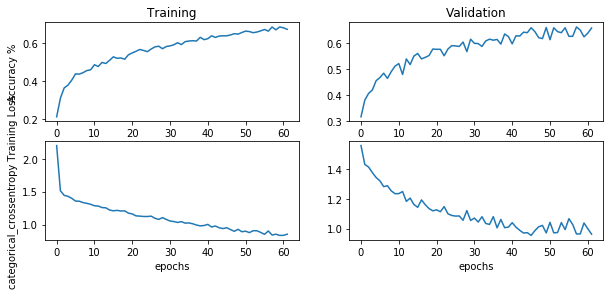

In [10]:
plotresult(cnnAlexNet_history)

### 3.3 Investigate at least two different convolutional network architectures

First CNN: Conv32\*2->maxpool->Conv64\*2->maxpool->Conv128\*2->maxpool->Dense256

In [11]:
l2_lambda = 0.0001

# Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
# Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
cnnfirst = Sequential()

cnnfirst.add(Conv2D(filters=32,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')) # more compact syntax

cnnfirst.add(Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnnfirst.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnnfirst.add(Conv2D(filters=64,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')) # more compact syntax

cnnfirst.add(Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnnfirst.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnnfirst.add(Conv2D(filters=128,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')) # more compact syntax

cnnfirst.add(Conv2D(filters=128,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnnfirst.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

# add one layer on flattened output
cnnfirst.add(Flatten())
cnnfirst.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnnfirst.add(Dense(256, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnnfirst.add(Dropout(0.5)) # add some dropout for regularization, again!
cnnfirst.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))


# Let's train the model 
cnnfirst.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnnfirst_history=cnnfirst.fit_generator(datagen.flow(X_train[0], y_train_ohe[0], batch_size=b_size), 
                  steps_per_epoch=int(len(X_train[0])/b_size), # how many generators to go through per epoch
                  epochs=E, verbose=1,
                  validation_data=(X_test[0],y_test_ohe[0]),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=Patience)]
                 )

cnnfirst.save('cnnfirst.h5')

Epoch 1/100
31/31 [==============================] - 13s 427ms/step - loss: 2.2608 - acc: 0.2223 - val_loss: 1.7022 - val_acc: 0.3130
Epoch 2/100
31/31 [==============================] - 11s 363ms/step - loss: 1.6566 - acc: 0.3169 - val_loss: 1.5865 - val_acc: 0.3680
Epoch 3/100
31/31 [==============================] - 12s 377ms/step - loss: 1.6385 - acc: 0.3452 - val_loss: 1.5694 - val_acc: 0.3730
Epoch 4/100
31/31 [==============================] - 12s 377ms/step - loss: 1.5797 - acc: 0.3573 - val_loss: 1.5407 - val_acc: 0.3930
Epoch 5/100
31/31 [==============================] - 12s 376ms/step - loss: 1.5421 - acc: 0.3866 - val_loss: 1.4923 - val_acc: 0.4190
Epoch 6/100
31/31 [==============================] - 12s 380ms/step - loss: 1.5117 - acc: 0.4105 - val_loss: 1.4662 - val_acc: 0.4520
Epoch 7/100
31/31 [==============================] - 12s 381ms/step - loss: 1.4413 - acc: 0.4510 - val_loss: 1.4080 - val_acc: 0.4770
Epoch 8/100
31/31 [==============================] - 12s 380ms

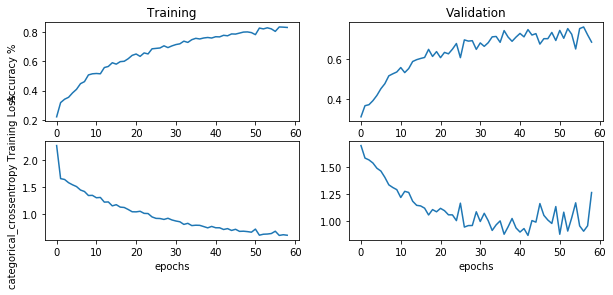

In [12]:
plotresult(cnnfirst_history)

Modifying the parameters for the various architectures

First CNN modify: Conv32->maxpool->Conv64->maxpool->Conv128->maxpool->Dense128

In [13]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 
l2_lambda = 0.0001

# Use Kaiming He to regularize ReLU layers: https://arxiv.org/pdf/1502.01852.pdf
# Use Glorot/Bengio for linear/sigmoid/softmax: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf 
cnnfirstM = Sequential()

cnnfirstM.add(Conv2D(filters=32,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')) # more compact syntax
cnnfirstM.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnnfirstM.add(Conv2D(filters=64,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')) # more compact syntax
cnnfirstM.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnnfirstM.add(Conv2D(filters=128,
               input_shape = (img_wh,img_wh,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu')) # more compact syntax

# add one layer on flattened output
cnnfirstM.add(Flatten())
cnnfirstM.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnnfirstM.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnnfirstM.add(Dropout(0.5)) # add some dropout for regularization, again!
cnnfirstM.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))

# Let's train the model 
cnnfirstM.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='adam', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
cnnfirstM_history=cnnfirstM.fit_generator(datagen.flow(X_train[0], y_train_ohe[0], batch_size=b_size), 
                  steps_per_epoch=int(len(X_train[0])/b_size), # how many generators to go through per epoch
                  epochs=E, verbose=1,
                  validation_data=(X_test[0],y_test_ohe[0]),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=Patience)]
                 )
cnnfirstM.save('cnnfirstM.h5')

Epoch 1/100
31/31 [==============================] - 13s 412ms/step - loss: 3.3783 - acc: 0.2155 - val_loss: 1.6802 - val_acc: 0.2160
Epoch 2/100
31/31 [==============================] - 12s 375ms/step - loss: 1.6416 - acc: 0.3086 - val_loss: 1.5540 - val_acc: 0.3750
Epoch 3/100
31/31 [==============================] - 12s 378ms/step - loss: 1.5672 - acc: 0.3561 - val_loss: 1.5393 - val_acc: 0.3820
Epoch 4/100
31/31 [==============================] - 12s 380ms/step - loss: 1.5245 - acc: 0.3961 - val_loss: 1.4797 - val_acc: 0.4110
Epoch 5/100
31/31 [==============================] - 12s 377ms/step - loss: 1.5000 - acc: 0.4041 - val_loss: 1.4256 - val_acc: 0.4560
Epoch 6/100
31/31 [==============================] - 12s 380ms/step - loss: 1.4796 - acc: 0.4156 - val_loss: 1.4108 - val_acc: 0.4630
Epoch 7/100
31/31 [==============================] - 12s 376ms/step - loss: 1.4448 - acc: 0.4381 - val_loss: 1.3392 - val_acc: 0.5140
Epoch 8/100
31/31 [==============================] - 12s 378ms

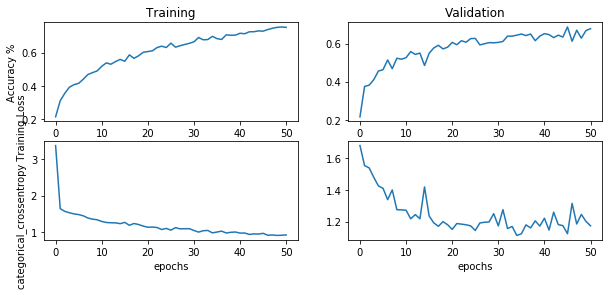

In [14]:
plotresult(cnnfirstM_history)

Second net ResNet Style Blocks<br>
 Conv2D32->maxpool\->Conv2D32 ->MaxPooling2D(split) ->Conv2D64\*2->Conv2D32 +split ->MaxPooling2D ->Dense256\}

In [15]:
%%time
l2_lambda = 0.0001
# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from keras.layers.normalization import BatchNormalization
from keras.layers import Add

input_holder = Input(shape=(img_wh, img_wh, 3))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet = Model(inputs=input_holder,outputs=x)

resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
resnet_history=resnet.fit_generator(datagen.flow(X_train[0], y_train_ohe[0], batch_size=b_size), 
                      steps_per_epoch=int(len(X_train[0])/b_size), # how many generators to go through per epoch
                      epochs=E, verbose=1,
                      validation_data=(X_test[0],y_test_ohe[0]),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=Patience)]
                     )

resnet.save('resnet.h5')

Epoch 1/100
31/31 [==============================] - 12s 395ms/step - loss: 1.9431 - acc: 0.2349 - val_loss: 1.6288 - val_acc: 0.2810
Epoch 2/100
31/31 [==============================] - 11s 358ms/step - loss: 1.6171 - acc: 0.2778 - val_loss: 1.5685 - val_acc: 0.3640
Epoch 3/100
31/31 [==============================] - 11s 362ms/step - loss: 1.5703 - acc: 0.3188 - val_loss: 1.5189 - val_acc: 0.3750
Epoch 4/100
31/31 [==============================] - 11s 361ms/step - loss: 1.5214 - acc: 0.3472 - val_loss: 1.4507 - val_acc: 0.4420
Epoch 5/100
31/31 [==============================] - 11s 360ms/step - loss: 1.5045 - acc: 0.3662 - val_loss: 1.4122 - val_acc: 0.4420
Epoch 6/100
31/31 [==============================] - 11s 364ms/step - loss: 1.4672 - acc: 0.4022 - val_loss: 1.3793 - val_acc: 0.4890
Epoch 7/100
31/31 [==============================] - 11s 367ms/step - loss: 1.4294 - acc: 0.4164 - val_loss: 1.3582 - val_acc: 0.4890
Epoch 8/100
31/31 [==============================] - 11s 366ms

Epoch 62/100
31/31 [==============================] - 11s 360ms/step - loss: 0.8802 - acc: 0.6771 - val_loss: 0.9912 - val_acc: 0.6470
Epoch 63/100
31/31 [==============================] - 11s 363ms/step - loss: 0.8950 - acc: 0.6705 - val_loss: 1.0919 - val_acc: 0.6130
Epoch 64/100
31/31 [==============================] - 11s 360ms/step - loss: 0.8999 - acc: 0.6608 - val_loss: 0.9405 - val_acc: 0.6670
Epoch 65/100
31/31 [==============================] - 12s 372ms/step - loss: 0.9125 - acc: 0.6701 - val_loss: 0.9360 - val_acc: 0.6640
Epoch 66/100
31/31 [==============================] - 11s 362ms/step - loss: 0.8704 - acc: 0.6788 - val_loss: 0.9370 - val_acc: 0.6710
Epoch 67/100
31/31 [==============================] - 11s 360ms/step - loss: 0.8462 - acc: 0.6978 - val_loss: 0.9448 - val_acc: 0.6740
Epoch 68/100
31/31 [==============================] - 11s 364ms/step - loss: 0.8767 - acc: 0.6784 - val_loss: 0.9506 - val_acc: 0.6460
Wall time: 12min 45s


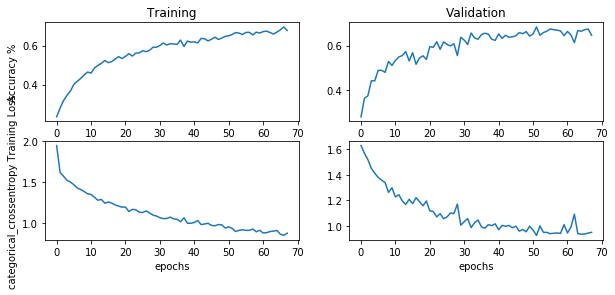

In [16]:
plotresult(resnet_history)

Second net ResNet Style Blocks modify<br>
 \{Conv2D32->maxpool\->Conv2D32 ->MaxPooling2D(split) ->Conv2D64\*2->Conv2D32 +split ->MaxPooling2D\}\*2 ->Dense256\}

In [17]:
%%time
# now lets use the LeNet architecture with batch norm
# We will also use ReLU where approriate and drop out 
from keras.layers.normalization import BatchNormalization
from keras.layers import Add

input_holder = Input(shape=(img_wh, img_wh, 3))

# start with a conv layer
x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)


x = Conv2D(filters=32,
               input_shape = (img_wh,img_wh,3),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(input_holder)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Conv2D(filters=64,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x_split)

x = Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

x = Conv2D(filters=32,
               kernel_size=(1,1),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu', 
               data_format="channels_last")(x)

# now add back in the split layer, x_split (residual added in)
x = Add()([x, x_split])
x = Activation("relu")(x)

x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(256)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASSES)(x)
x = Activation('softmax')(x)

resnet_M = Model(inputs=input_holder,outputs=x)

resnet_M.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy'])

# the flow method yields batches of images indefinitely, with the given transofmrations
resnet_M_history=resnet_M.fit_generator(datagen.flow(X_train[0], y_train_ohe[0], batch_size=b_size), 
                      steps_per_epoch=int(len(X_train[0])/b_size), # how many generators to go through per epoch
                      epochs=E, verbose=1,
                      validation_data=(X_test[0],y_test_ohe[0]),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=Patience)]
                     )

resnet_M.save('resnet_M.h5')

Epoch 1/100
31/31 [==============================] - 12s 401ms/step - loss: 2.7326 - acc: 0.2117 - val_loss: 1.6515 - val_acc: 0.2170
Epoch 2/100
31/31 [==============================] - 11s 370ms/step - loss: 1.6457 - acc: 0.2225 - val_loss: 1.6268 - val_acc: 0.2010
Epoch 3/100
31/31 [==============================] - 12s 375ms/step - loss: 1.6219 - acc: 0.2349 - val_loss: 1.5924 - val_acc: 0.2990
Epoch 4/100
31/31 [==============================] - 12s 375ms/step - loss: 1.5663 - acc: 0.3347 - val_loss: 1.5100 - val_acc: 0.4000
Epoch 5/100
31/31 [==============================] - 12s 374ms/step - loss: 1.5099 - acc: 0.3707 - val_loss: 1.4418 - val_acc: 0.4040
Epoch 6/100
31/31 [==============================] - 12s 375ms/step - loss: 1.4719 - acc: 0.3963 - val_loss: 1.4057 - val_acc: 0.4270
Epoch 7/100
31/31 [==============================] - 12s 373ms/step - loss: 1.4127 - acc: 0.4335 - val_loss: 1.3518 - val_acc: 0.4500
Epoch 8/100
31/31 [==============================] - 12s 377ms

Epoch 62/100
31/31 [==============================] - 12s 377ms/step - loss: 0.7737 - acc: 0.7270 - val_loss: 0.9595 - val_acc: 0.6780
Epoch 63/100
31/31 [==============================] - 12s 377ms/step - loss: 0.7805 - acc: 0.7267 - val_loss: 0.9392 - val_acc: 0.6880
Epoch 64/100
31/31 [==============================] - 12s 378ms/step - loss: 0.7511 - acc: 0.7255 - val_loss: 0.9130 - val_acc: 0.7010
Epoch 65/100
31/31 [==============================] - 12s 385ms/step - loss: 0.7493 - acc: 0.7276 - val_loss: 0.8980 - val_acc: 0.7070
Epoch 66/100
31/31 [==============================] - 11s 371ms/step - loss: 0.7862 - acc: 0.7122 - val_loss: 0.9796 - val_acc: 0.6680
Epoch 67/100
31/31 [==============================] - 12s 377ms/step - loss: 0.7696 - acc: 0.7219 - val_loss: 0.9248 - val_acc: 0.6820
Epoch 68/100
31/31 [==============================] - 12s 378ms/step - loss: 0.7735 - acc: 0.7190 - val_loss: 0.9733 - val_acc: 0.6790
Epoch 69/100
31/31 [==============================] - 1

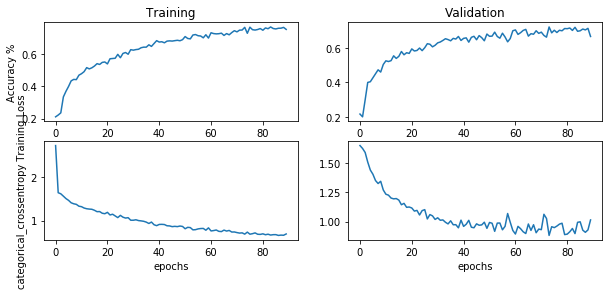

In [18]:
plotresult(resnet_M_history)

### 3.4 Visualize the final results of the CNNs and interpret the performance.

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

def getf1(model):
    yhat = np.argmax(model.predict(X_test[0]),axis=1)
    F1=f1_score(yhat,y_test[0],average='micro')
    return F1

F1_first_cnn=getf1(cnnfirst)
F1_firstM_cnn=getf1(cnnfirstM)
F1_res=getf1(resnet)
F1_resM=getf1(resnet_M)
F1_AlexNet=getf1(cnnAlexNet)

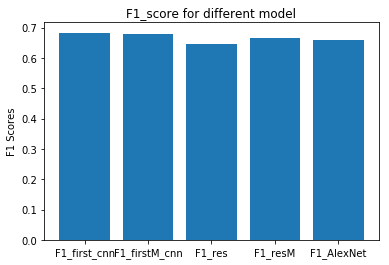

In [20]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
score = [F1_first_cnn, F1_firstM_cnn, F1_res, F1_resM,F1_AlexNet]
fig, ax = plt.subplots()
plt.title('F1_score for different model')
plt.ylabel('F1 Scores')

plt.bar(x, score)
plt.xticks(x, ('F1_first_cnn', 'F1_firstM_cnn', 'F1_res', 'F1_resM','F1_AlexNet'))
plt.show()

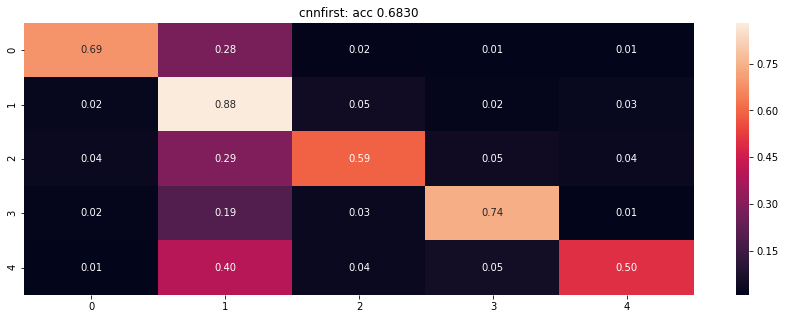

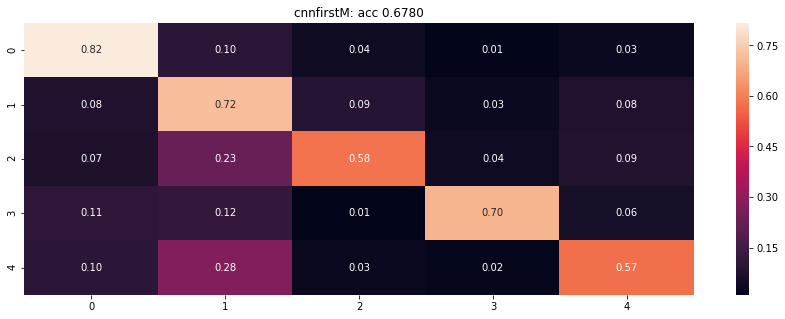

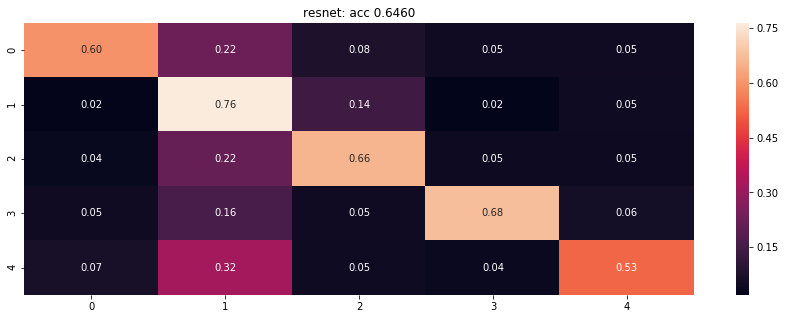

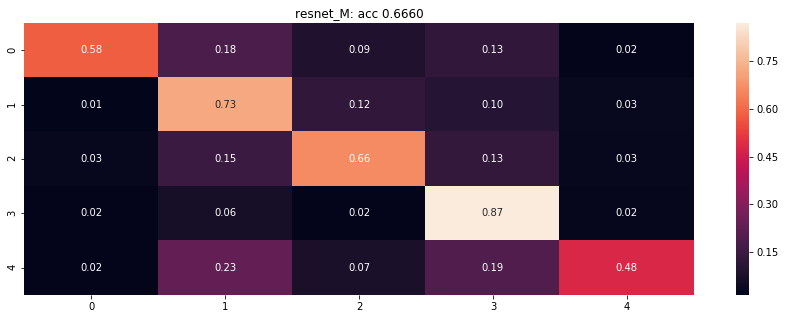

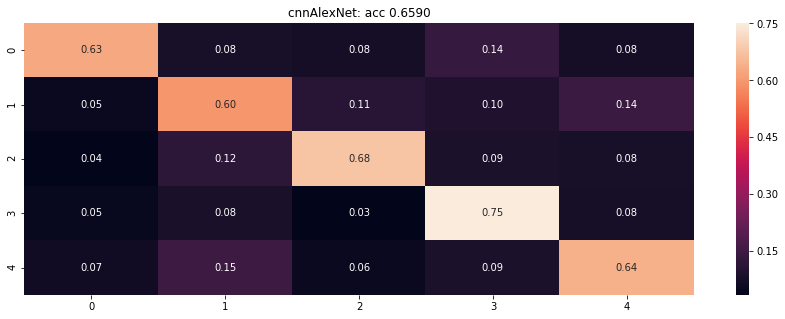

In [21]:
summarize_net(cnnfirst, X_test[0], y_test[0], title_text='cnnfirst:')
summarize_net(cnnfirstM, X_test[0], y_test[0], title_text='cnnfirstM:')
summarize_net(resnet, X_test[0], y_test[0], title_text='resnet:')
summarize_net(resnet_M, X_test[0], y_test[0], title_text='resnet_M:')
summarize_net(cnnAlexNet, X_test[0], y_test[0], title_text='cnnAlexNet:')

As shown in the confusion matrices above, target classes 4 and 0 tend to be the most difficult classes for our CNNs to classify. Class 4 is frequently confused with class 1, and class 0 is frequently confused with class 2. However, these confusions are not so significant that our network is completely unusable, with both of their classification accuracies increasing to over 60% for the our best performing CNN, AlexNet.

### 3.5 Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques.  

In [22]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test,X_mlp):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
#         print(y_test)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f')
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_mlp), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f')
        plt.title('MLP: '+str(acc_mlp))

In [23]:
%%time
# make a 3 layer keras MLP
mlp = Sequential()
mlp.add( Dense(input_dim=X_train_vec[0].shape[1], units=60, activation='relu') )
mlp.add( Dense(units=30, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

mlp.fit(X_train_vec[0], y_train_ohe[0], 
        batch_size=b_size, epochs=E, 
        validation_data=(X_test_vec[0],y_test_ohe[0]),
        callbacks=[EarlyStopping(monitor='val_loss', patience=Patience)],
        shuffle=True, verbose=1)

mlp.save('mlp.h5')

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 3s 764us/step - loss: 0.2113 - acc: 0.2608 - val_loss: 0.1956 - val_acc: 0.3210
Epoch 2/100
4000/4000 [==============================] - 2s 496us/step - loss: 0.1728 - acc: 0.3400 - val_loss: 0.1858 - val_acc: 0.3190
Epoch 3/100
4000/4000 [==============================] - 2s 493us/step - loss: 0.1569 - acc: 0.3837 - val_loss: 0.1679 - val_acc: 0.3510
Epoch 4/100
4000/4000 [==============================] - 2s 486us/step - loss: 0.1491 - acc: 0.4293 - val_loss: 0.1691 - val_acc: 0.3320
Epoch 5/100
4000/4000 [==============================] - 2s 477us/step - loss: 0.1428 - acc: 0.4545 - val_loss: 0.1729 - val_acc: 0.3350
Epoch 6/100
4000/4000 [==============================] - 2s 499us/step - loss: 0.1308 - acc: 0.5002 - val_loss: 0.1710 - val_acc: 0.3580
Epoch 7/100
4000/4000 [==============================] - 2s 481us/step - loss: 0.1244 - acc: 0.5337 - val_loss: 0.1667 - val_acc: 

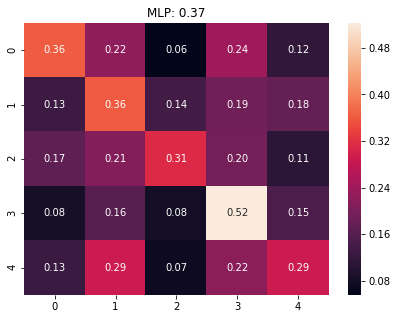

In [24]:
compare_mlp_cnn(None,mlp,X_test[0],y_test[0],X_test_vec[0])
# compare_mlp_cnn(cnn,None,[0],y_test[0])

In [7]:
from keras.utils import np_utils
def plotROC(X,Y,model,name):
    y_score =model.predict(X)
    y_t=Y
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(NUM_CLASSES):
        fpr[j], tpr[j], _ = roc_curve(y_t[:, j], y_score[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_t.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr[2], tpr[2],
             lw=1, label='model %s ROC curve (area = %0.2f)' % (name,roc_auc[2]))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")


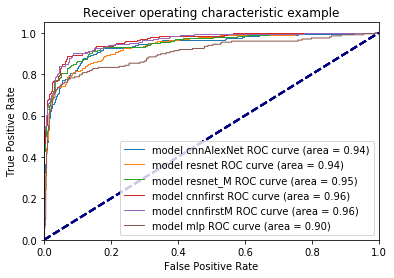

In [8]:
plotROC(X_test[0],y_test_ohe[0],cnnAlexNet,'cnnAlexNet')
plotROC(X_test[0],y_test_ohe[0],resnet,'resnet')
plotROC(X_test[0],y_test_ohe[0],resnet_M,'resnet_M')
plotROC(X_test[0],y_test_ohe[0],cnnfirst,'cnnfirst')
plotROC(X_test[0],y_test_ohe[0],cnnfirstM,'cnnfirstM')
plotROC(X_test_vec[0],y_test_ohe[0],mlp,'mlp')
plt.show()

Use transfer learning to pre-train the weights of your initial layers of your CNN.

In [10]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from scipy.misc import imresize


In [19]:
x_train_up = [imresize(x,size=(224,224,3), interp='nearest') for x in X_train[0]]
x_train_up = np.stack(x_train_up,axis=0)
print(x_train_up.shape)

x_test_up = [imresize(x,size=(224,224,3), interp='nearest') for x in X_test[0]]
x_test_up = np.stack(x_test_up,axis=0)
print(x_test_up.shape)

(4000, 224, 224, 3)
(1000, 224, 224, 3)


In [43]:
# connect new layers to the output
res_model = ResNet50(weights='imagenet')
x = res_model.output

# let's add a fully-connected layer
x = Dense(1024, activation='relu',kernel_initializer='he_uniform')(x)
# and a fully connected layer 
predictions = Dense(NUM_CLASSES, activation='softmax', kernel_initializer='glorot_uniform')(x)

Res50 = Model(inputs=res_model.input, outputs=predictions)

# freeze ResNet during training
for layer in res_model.layers:
    layer.trainable = False
    
Res50.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Res50_history=Res50.fit(x_train_up,y_train_ohe[0],epochs=E,batch_size=128,verbose=1,
          validation_data=(x_test_up,y_test_ohe[0]),
          callbacks=[EarlyStopping(monitor='val_loss', patience=Patience)])

Res50.save('Res50.h5')

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 20s 5ms/step - loss: 1.5466 - acc: 0.5627 - val_loss: 1.3600 - val_acc: 0.6090
Epoch 2/100
4000/4000 [==============================] - 18s 5ms/step - loss: 1.3061 - acc: 0.7135 - val_loss: 1.0847 - val_acc: 0.5990
Epoch 3/100
4000/4000 [==============================] - 18s 5ms/step - loss: 1.0121 - acc: 0.7428 - val_loss: 1.0765 - val_acc: 0.5960
Epoch 4/100
4000/4000 [==============================] - 18s 5ms/step - loss: 0.8187 - acc: 0.7655 - val_loss: 1.1203 - val_acc: 0.6260
Epoch 5/100
4000/4000 [==============================] - 18s 5ms/step - loss: 0.6950 - acc: 0.7915 - val_loss: 1.1888 - val_acc: 0.6370
Epoch 6/100
4000/4000 [==============================] - 18s 5ms/step - loss: 0.6202 - acc: 0.8075 - val_loss: 1.2190 - val_acc: 0.6410
Epoch 7/100
4000/4000 [==============================] - 18s 5ms/step - loss: 0.5555 - acc: 0.8280 - val_loss: 1.2699 - val_acc: 0.6450


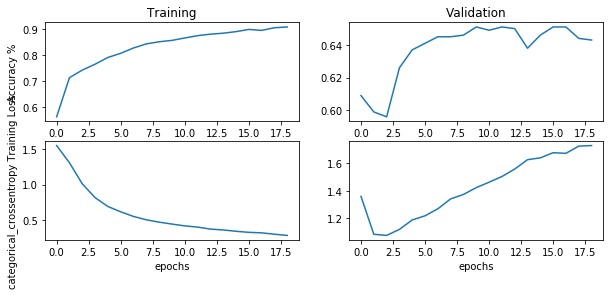

In [44]:
plotresult(Res50_history)

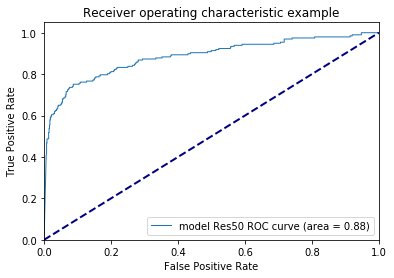

In [12]:
plotROC(x_test_up,y_test_ohe[0],Res50,'Res50')
plt.show()

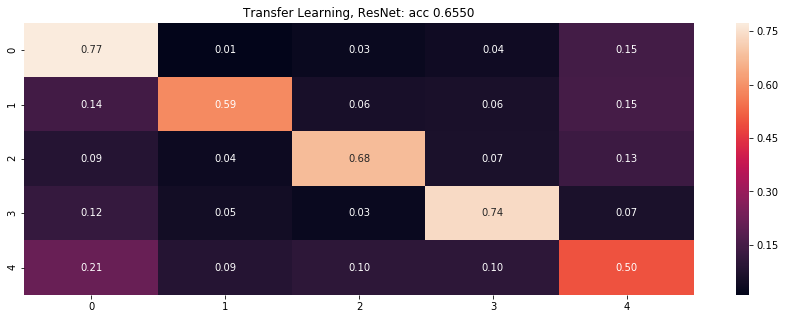

In [17]:
summarize_net(Res50, x_test_up, y_test[0], title_text='Transfer Learning, ResNet:')

In [49]:
#free GPU Memory
from keras import backend as K
K.clear_session()

In [11]:
# Train from scratch
res_model = ResNet50(weights=None)
x = res_model.output

# let's add a fully-connected layer
x = Dense(1024, activation='relu',kernel_initializer='he_uniform')(x)
# and a fully connected layer 
predictions = Dense(NUM_CLASSES, activation='softmax', kernel_initializer='glorot_uniform')(x)

Res50_scratch = Model(inputs=res_model.input, outputs=predictions)

    
Res50_scratch.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Res50_scratch_history=Res50_scratch.fit(x_train_up,y_train_ohe[0],epochs=E,batch_size=42,verbose=1,
                  validation_data=(x_test_up,y_test_ohe[0]),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=Patience)])

Res50_scratch.save('Res50_scratch.h5')

Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 66s 17ms/step - loss: 1.5957 - acc: 0.2545 - val_loss: 1.6595 - val_acc: 0.2000
Epoch 2/100
4000/4000 [==============================] - 53s 13ms/step - loss: 1.5627 - acc: 0.2700 - val_loss: 1.7177 - val_acc: 0.2310
Epoch 3/100
4000/4000 [==============================] - 53s 13ms/step - loss: 1.5477 - acc: 0.2850 - val_loss: 1.7090 - val_acc: 0.2390
Epoch 4/100
4000/4000 [==============================] - 53s 13ms/step - loss: 1.5284 - acc: 0.2965 - val_loss: 1.7616 - val_acc: 0.1810
Epoch 5/100
4000/4000 [==============================] - 53s 13ms/step - loss: 1.5186 - acc: 0.3138 - val_loss: 1.6564 - val_acc: 0.2510
Epoch 6/100
4000/4000 [==============================] - 53s 13ms/step - loss: 1.4938 - acc: 0.3288 - val_loss: 1.6312 - val_acc: 0.2730
Epoch 7/100
4000/4000 [==============================] - 53s 13ms/step - loss: 1.5024 - acc: 0.3228 - val_loss: 1.6909 - val_acc: 

4000/4000 [==============================] - 53s 13ms/step - loss: 0.5631 - acc: 0.8030 - val_loss: 1.4022 - val_acc: 0.5170
Epoch 61/100
4000/4000 [==============================] - 53s 13ms/step - loss: 0.4962 - acc: 0.8212 - val_loss: 1.1851 - val_acc: 0.6480
Epoch 62/100
4000/4000 [==============================] - 53s 13ms/step - loss: 0.4580 - acc: 0.8415 - val_loss: 1.8710 - val_acc: 0.4730
Epoch 63/100
4000/4000 [==============================] - 53s 13ms/step - loss: 0.4639 - acc: 0.8342 - val_loss: 1.8804 - val_acc: 0.5020
Epoch 64/100
4000/4000 [==============================] - 53s 13ms/step - loss: 0.4251 - acc: 0.8492 - val_loss: 1.3921 - val_acc: 0.6080
Epoch 65/100
4000/4000 [==============================] - 53s 13ms/step - loss: 0.3547 - acc: 0.8777 - val_loss: 1.4688 - val_acc: 0.6050
Epoch 66/100
4000/4000 [==============================] - 53s 13ms/step - loss: 0.3590 - acc: 0.8747 - val_loss: 1.3317 - val_acc: 0.6020
Epoch 67/100
4000/4000 [=======================

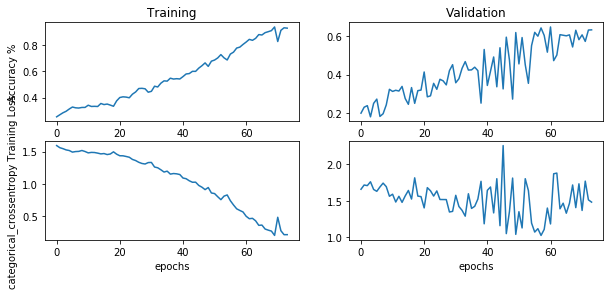

In [12]:
plotresult(Res50_scratch_history)

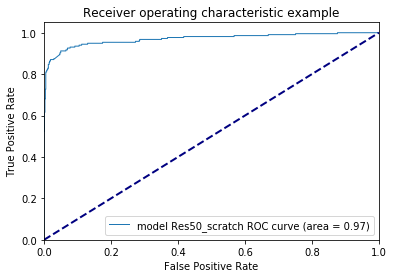

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
plotROC(x_test_up,y_test_ohe[0],Res50_scratch,'Res50_scratch')
plt.show()

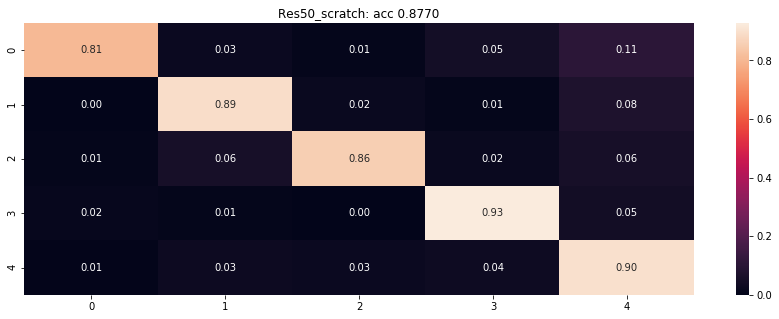

In [21]:
summarize_net(Res50_scratch, x_test_up, y_test[0], title_text='Res50_scratch:')

In this task, we used pre-trained Resnet50 and Resnet50 trained from scratch. Resnet50 trained from scratch performed better than pre-trained Resnet50. This might because the pre-trained Resnet50 was trained on imageNet, which make this model have a very good ability of generalization. When it comes to a food-oriented task, Resnet50 trained from scratch will be more suitable. Because it was trained for extracting food feature only. However, training Resnet50 from scratch takes 1 hour, while using pre-trained Resnet50 only took 7 minutes. Therefore, it makes the most sense to use pre-trained Resnet50 in some situations.

### Load saved model

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from keras.models import load_model

Res50_scratch = load_model('Res50_scratch.h5')
Res50 = load_model('Res50.h5')
mlp = load_model('mlp.h5')
cnnAlexNet = load_model('cnnAlexNet.h5')
resnet = load_model('resnet.h5')
resnet_M = load_model('resnet_M.h5')
cnnfirst = load_model('cnnfirst.h5')
cnnfirstM = load_model('cnnfirstM.h5')
